In [63]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os  
import glob
%matplotlib inline

In [64]:
test_images = glob.glob("../test_images/*.jpg")
test_images

['../test_images\\straight_lines1.jpg',
 '../test_images\\straight_lines2.jpg',
 '../test_images\\test1.jpg',
 '../test_images\\test2.jpg',
 '../test_images\\test3.jpg',
 '../test_images\\test4.jpg',
 '../test_images\\test5.jpg',
 '../test_images\\test6.jpg']

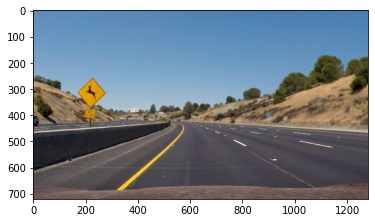

In [65]:
# Loading and plotting the image
img = plt.imread(test_images[3])
plt.imshow(img)

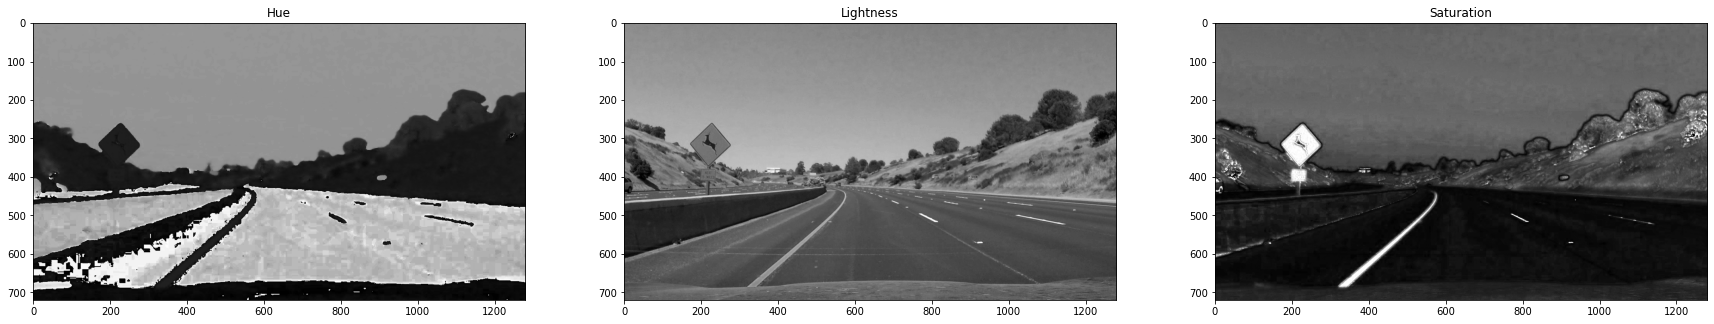

In [66]:
# Getting to HLS color space
hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
h_channel = hls[:,:,0]
l_channel = hls[:,:,1]
s_channel = hls[:,:,2]
# Plotting
f, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(30,10))
ax1.set_title("Hue")
ax1.imshow(h_channel, cmap='gray')
ax2.set_title("Lightness")
ax2.imshow(l_channel, cmap='gray')
ax3.set_title("Saturation")
ax3.imshow(s_channel, cmap='gray')

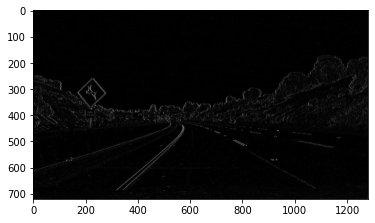

In [67]:
# Converting to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
# Getting x derivative
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
# Getting absolute value
abs_sobelx = np.absolute(sobelx)
# Scaling and Converting to 8-bit
scaled_sobelx = np.uint8(255*abs_sobelx/np.max(abs_sobelx))

# Plotting
plt.imshow(scaled_sobelx, cmap='gray')
                   

In [70]:
def binary_image(img, s_thresh=(150, 255), sx_thresh=(200, 255)):
    ########### Binary image for Color #################
    # Going to HLS color space
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    s_channel = hls[:,:,2]
    # Threshold color channel
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh[0]) & (s_channel <= s_thresh[1])] = 1
    
    ########## Binary image for Gradiant ##############
    # Converting to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Getting x derivative
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
    # Getting absolute value
    abs_sobelx = np.absolute(sobelx)
    # Scaling and Converting to 8-bit
    scaled_sobelx = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    # Applying thresholds
    sx_binary = np.zeros_like(gray)
    sx_binary[(scaled_sobelx >= sx_thresh[0]) & (scaled_sobelx <= sx_thresh[1])] = 1
    
    # Defining the binary and binay_color
    binary = np.zeros_like(s_binary)
    binary[(s_binary == 1) | (sx_binary == 1)] = 1
    color_binary = np.dstack((s_binary, sx_binary, np.zeros_like(sx_binary)))*255
    
    return binary, color_binary

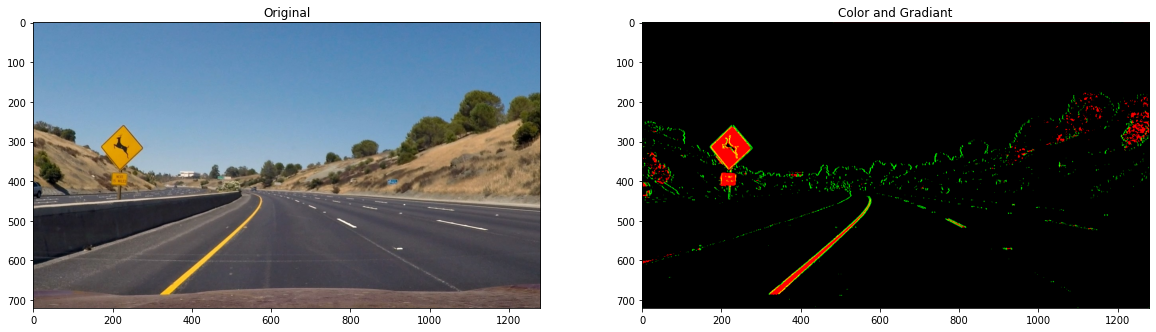

In [72]:
binary, color_binary = binary_image(img, (150,255), (50,255))
f, (ax1,ax2) = plt.subplots(1,2, figsize=(20,10))
ax1.set_title("Original")
ax1.imshow(img)
ax2.set_title("Color and Gradiant")
ax2.imshow(color_binary)

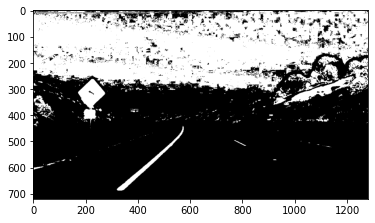

In [62]:
plt.imshow(color_binary[:,:,0], cmap='gray')